In [3]:
#pip install qiskit

In [4]:
#pip install qiskit[visualization]

In [5]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.circuit.library import MCMT
from qiskit.circuit.library import MCMTVChain
from qiskit.quantum_info.operators import Operator, Pauli
import qiskit.quantum_info as qi
import numpy as np
import math as m
#from qiskit.circuit.library.standard_gates import HGate


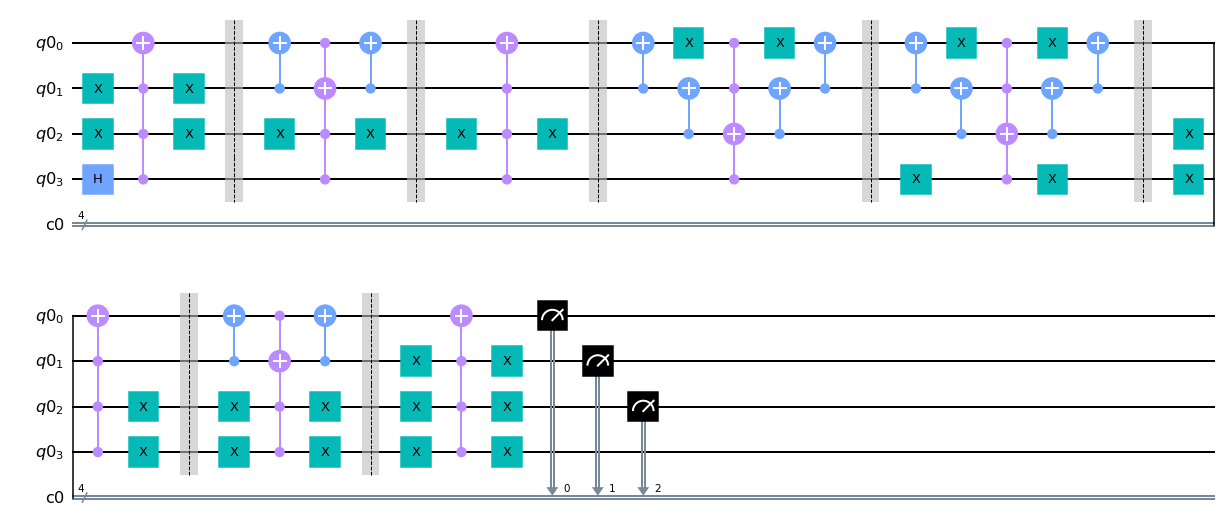

In [6]:
creg_c = qiskit.ClassicalRegister(4)
qreg_q = qiskit.QuantumRegister(4)

circuit = qiskit.QuantumCircuit(qreg_q,creg_c)

steps=1

for i in range(steps):
  circuit.h(3)
  circuit.x(1)
  circuit.x(2)
  circuit.mcx([1, 2, 3], 0)
  circuit.x(1)
  circuit.x(2)

  circuit.barrier()

  circuit.x(2)
  circuit.cx(1,0)
  circuit.mcx([0, 2, 3], 1)
  circuit.cx(1,0)
  circuit.x(2)

  circuit.barrier()

  circuit.x(2)
  circuit.mcx([1, 2, 3], 0)
  circuit.x(2)

  circuit.barrier()

  circuit.cx(1,0)
  circuit.x(0)
  circuit.cx(2,1)
  circuit.mcx([0, 1, 3], 2)
  circuit.cx(2,1)
  circuit.x(0)
  circuit.cx(1,0)

  circuit.barrier()

  circuit.cx(1,0)
  circuit.x(0)
  circuit.x(3)
  circuit.cx(2,1)
  circuit.mcx([0, 1, 3], 2)
  circuit.cx(2,1)
  circuit.x(0)
  circuit.x(3)
  circuit.cx(1,0)

  circuit.barrier()

  circuit.x(2)
  circuit.x(3)
  circuit.mcx([1, 2, 3], 0)
  circuit.x(2)
  circuit.x(3)

  circuit.barrier()

  circuit.x(2)
  circuit.x(3)
  circuit.cx(1, 0)
  circuit.mcx([0, 2, 3], 1)
  circuit.cx(1, 0)
  circuit.x(2)
  circuit.x(3)

  circuit.barrier()

  circuit.x(1)
  circuit.x(2)
  circuit.x(3)
  circuit.mcx([1, 2, 3], 0)
  circuit.x(1)
  circuit.x(2)
  circuit.x(3)


circuit.measure(0, 0)
circuit.measure(1, 1)
circuit.measure(2, 2)

circuit.draw('mpl')

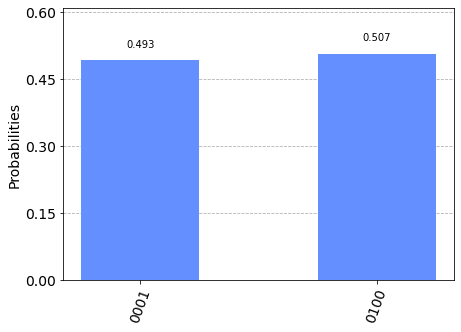

In [7]:
sim = qiskit.Aer.get_backend('qasm_simulator')
job = qiskit.execute(circuit,sim,shots=8192)
qiskit.visualization.plot_histogram(job.result().get_counts())